# API-201 ABC REVIEW SESSION #6

**Friday, October 21**

# Table of Contents
1. [Lecture Recap - Sampling Distribution and Confidence Interval](#Lecture-Recap)
2. [Exercises - Visualizing Project STAR](#Exercises)

# Lecture recap <a class="anchor" id="Lecture-Recap"></a>

## Sampling distribution

Suppose there is some proportion ***p*** that we want to measure. We usually don't have access to information for all the population, so we estimate ***p*** by computing the proportion ***p̂*** in a random sample. 

The sample proportion ***p̂*** is random, as it may produce a different estimate if we apply it to a different sample. The **sampling distribution** is the distribution of the sample proportion ***p̂***. In other words, it is a probability distribution formed by the estimates we obtain from calculating the proportion for different samples from the population of interest.

The sample proportion ***p̂*** is a random variable, so it has an expected value and a standard deviation. The **Central Limit Theorem** states that for a large enough sample (n > 30), the distribution of ***p̂*** is approximately normal:
\begin{align*}
N\Big(p,\sqrt{\frac{p(1-p)}{n}}\Big)
\end{align*}

If we were interested in measuring a population mean ***$\mu$*** instead of a population proportion ***p***, the distribution of ***$\hat{\mu}$*** will have an approximately normal sampling distribution with mean $\mu$ and standard deviation $\dfrac{\sigma}{\sqrt{n}}$:
\begin{align*}
N\Big(\mu,\frac{\sigma}{\sqrt{n}}\Big)
\end{align*}

The standard deviation of the sampling deviation is called the __standard error__.

## Sampling distribution in R

Suppose we had income data for the entire population of a city. Does this look like a normal distribution?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Population Income Mean μ Population Income Std. Dev σ 
                    70069.46                     37279.41

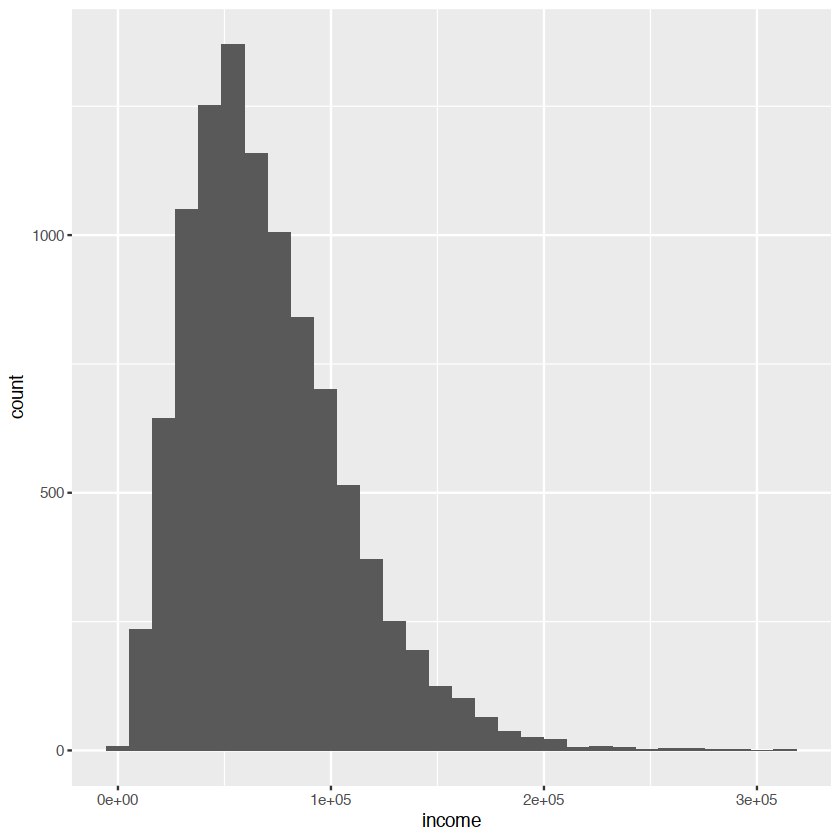

In [33]:
library(tidyverse)

# Simulate population data
set.seed(101)
data <- tibble(income = 1e4 * rchisq(10000, df = 7))

# Plot population distribution
ggplot(data) + geom_histogram(aes(x = income))

# Calculate population mean and std. deviation
c("Population Income Mean μ" = mean(data$income),
  "Population Income Std. Dev σ" = sd(data$income))

We can sample 500 people from the population using the function `sample`. Does it look like a normal distribution?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Sample Income Mean μhat Sample Income Std. Dev σhat 
                   70780.18                    39195.56

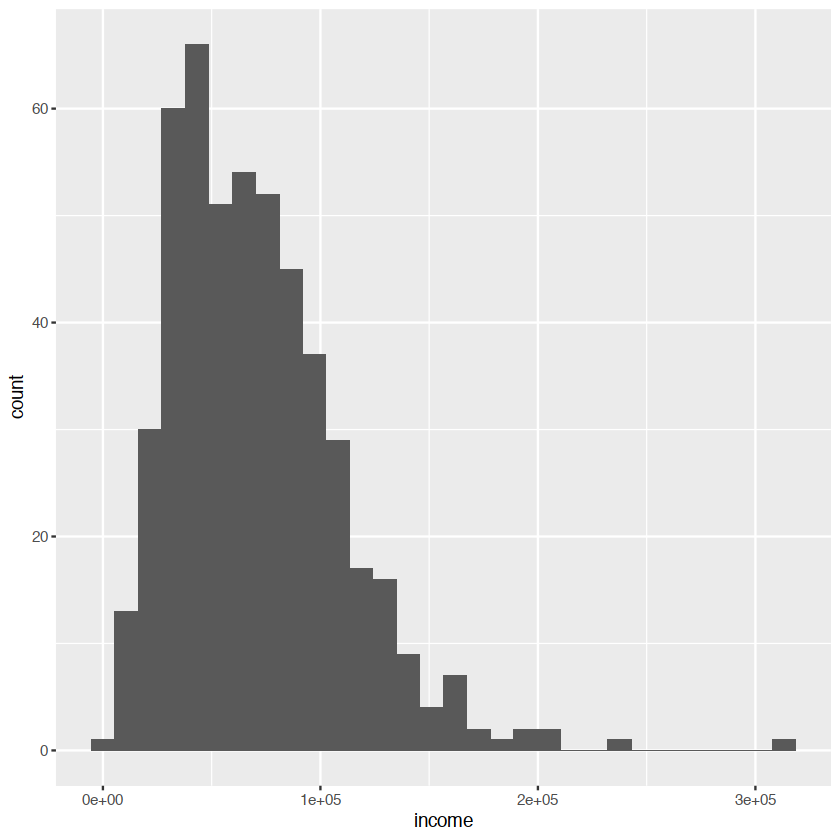

In [34]:
# Take one random sample
one_sample <- tibble(income = sample(data$income, 500))

# Plot sample distribution
ggplot(one_sample) + geom_histogram(aes(x = income))

# Calculate sample mean and std. deviation
c("Sample Income Mean μhat" = mean(one_sample$income),
  "Sample Income Std. Dev σhat" = sd(one_sample$income))

We can use the `replicate` function to sample from the population many times and calculate for each simulation the sample mean $\hat{\mu}$.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Sampling Distribution Mean             Standard error 
                 70055.522                   1624.109

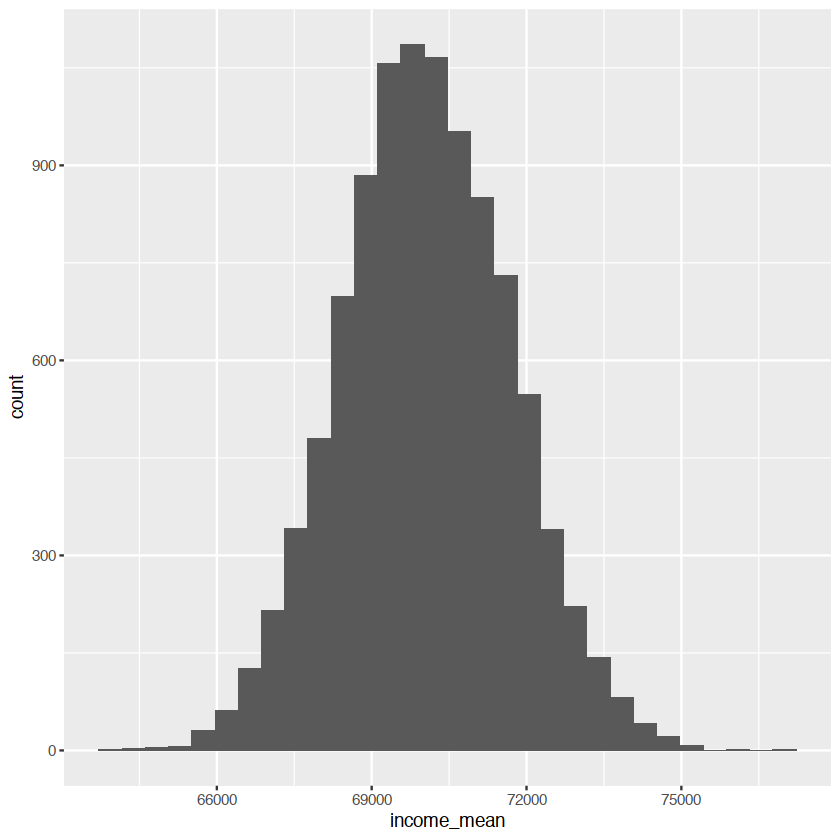

In [38]:
# Sample many times and calculate many sample means
set.seed(1)
income_means <- tibble(income_mean = replicate(10000, mean(sample(data$income, 500))))

# Plot sampling distribution
ggplot(income_means) + geom_histogram(aes(x = income_mean))

# Calculate mean and standard deviation of sampling distribution
c("Sampling Distribution Mean" = mean(income_means$income_mean),
  "Standard error" = sd(income_means$income_mean))

As you can see, even though the population distribution is not normally distributed, the distribution of the sample mean is approximately normally distributed.

## Confidence intervals

Going back to the example about sample proportions, we can use the sampling distribution of ***p̂*** to tell us how confident we are in our estimate. if the sampling distribution is normal, then we can construct a 95% confidence interval around ***p̂*** by using the mean and standard deviation of ***p̂***. However, given that we don't know ***p***, we use both the sample proportion and the estimated standard error instead, such that: 
\begin{align*}
CI = p̂ \pm 2 SD(p̂)
\end{align*}

where:
\begin{align*}
SD(p̂) = \sqrt{\frac{p̂(1-p̂)}{n}}
\end{align*}

This implies that 95% of all possible confidence intervals will contain the true value of ***p***.

If we wanted to estimate a mean instead, the 95% confidence interval has the same form as before:
\begin{align*}
CI = \hat{\mu} \pm 2 SD(\hat{\mu})
\end{align*}

Plugging in the standard deviation of the sample mean, we get:

\begin{align*}
CI = \hat{\mu} \pm \frac{2\hat{\sigma}}{\sqrt{n}}
\end{align*}

# Exercise: Project STAR <a class="anchor" id="Exercises"></a>

The Project STAR (for Student-Teacher Achievement Ratio) was designed to determine the effect of smaller class size in the earliest grades on short-term and long-term pupil performance ([source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766)). Over 7,000 students in 79 schools across the state of Tennessee were randomly assigned into one of three interventions: small class (13 to 17 students per teacher), regular class (22 to 25 students per teacher), and regular-with-aide class (22 to 25 students with a full-time teacher's aide). Classroom teachers were also randomly assigned to the classes they would teach. The interventions were initiated as the students entered school in kindergarten and continued through third grade. 



In this exercise, we are going to use data from the STAR Project to learn about the pupils involved in the project through visualization and measure the association between classroom size and student achievement.

## Data Dictionary
* `stdntid`: unique student ID
* `gender`: student gender; F - female, M - male
* `race`: student's race; W - White, B - Black, A - Asian, H - Hispanic, O - Other
* `gkschid`: kindergarten school ID
* `gktchid`: kindergarten teacher ID
* `gkclasstype`: kindergarten class type
* `gkclasssize`: kindergarten class size; S - Small, R - Regular/Large
* `gktyears`: teacher experience in years
* `gktreadss`: student's kindergarten reading score
* `gktmathss`: student's kindergarten math score
* `gkpresent`: number of days student present in kindergarten
* `hsactenglish`: student's high school ACT english score
* `hsactmath`: student's high school ACT math score
* `hsactread`: student's high school ACT reading score
* `hsactscience`:student's high school ACT science score

**1. Upload the Excel file `STAR_data.xlsx` to Google Colab and use `read_excel` to read its first worksheet as a new table called `star_data`. How many rows and columns does this dataset have? Examine the first 10 rows of the data.**

In [5]:
library(tidyverse)
library(readxl)

# Your answer here!

# START
star_data <- read_excel(path = "STAR_data.xlsx", sheet = 1)

dim(star_data)

head(star_data, 10)
# END  

[1] 11601    15

stdntid,gender,race,gkschid,gktchid,gkclasstype,gkclasssize,gktyears,gktreadss,gktmathss,gkpresent,hsactenglish,hsactmath,hsactread,hsactscience
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10000,M,W,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10001,M,W,169229,16922904,R,24,5,NA,NA,161,NA,NA,NA,NA
10002,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10003,M,W,NA,NA,NA,NA,NA,NA,NA,NA,16,21,28,24
10004,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10005,M,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10006,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10007,M,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10008,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**2. The code below counts the number of observations with _any_ missing value. Drop these observations using the function `drop_na` and create a new dataset called `star_data_clean`. How many observations does this new dataset have?**

In [6]:
sum(!complete.cases(star_data))

# Your answer here!

# START
star_data_clean <- drop_na(star_data)
nrow(star_data_clean)
# END

[1] 9354

[1] 2247

**3a. Plot the racial composition of children in STAR by gender using `geom_col`. The proportions have already been calculated for you below. Sort the bars from largest to smallest.** 

i. Using `arrange` won't sort the bars for you. Instead you need to reorder the race variable by proportions. To do this, specify the x aesthetic as `race = fct_reorder(race, desc(prop))`.

ii. Map gender to the `fill` aesthetic so that proportions for boys and girls appear as different colors.

iii. Use the argument `position = "dodge"` of `geom_col` to prevent bars from overlapping.

race,gender,n,prop
<chr>,<chr>,<int>,<dbl>
A,F,4,0.003014318
A,M,2,0.002173913
B,F,360,0.271288621
B,M,202,0.219565217
H,M,2,0.002173913
O,F,2,0.001507159
O,M,1,0.001086957
W,F,961,0.724189902
W,M,713,0.775000000


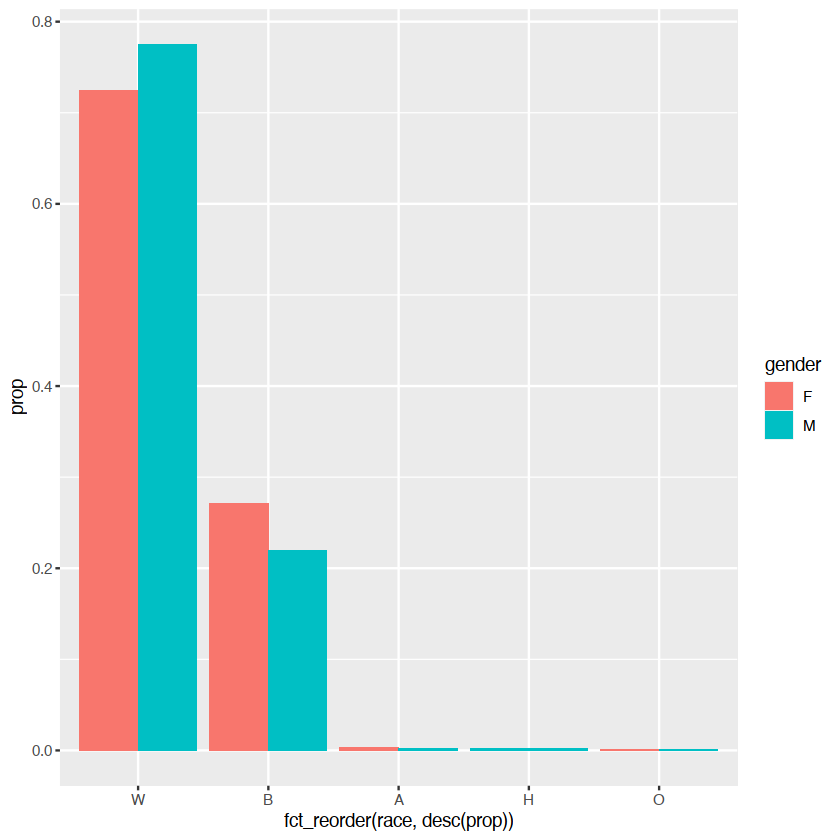

In [7]:
# Calculate proportions 
star_race_props <- star_data_clean %>%
    count(race, gender) %>%
    group_by(gender) %>%
    mutate(prop = n / sum(n))

star_race_props

# Your answer here!

# START
ggplot(star_race_props) +
    geom_col(aes(x = fct_reorder(race, desc(prop)), y = prop, fill = gender),
             position = "dodge")
# END


**3b. Label each race, label boys and girls, title the plot, and label the axes.** 

i. To label the races use `scale_x_discrete(labels = c("White", "Black", "Asian", "Hispanic", "Other"))`.

ii. To label boys and girls use `scale_fill_discrete(name = NULL, labels = c("Girls", "Boys"))`

iii. To title and label the axes use `labs(title = "Racial Composition of STAR", x = NULL, y = "Proportion")`.



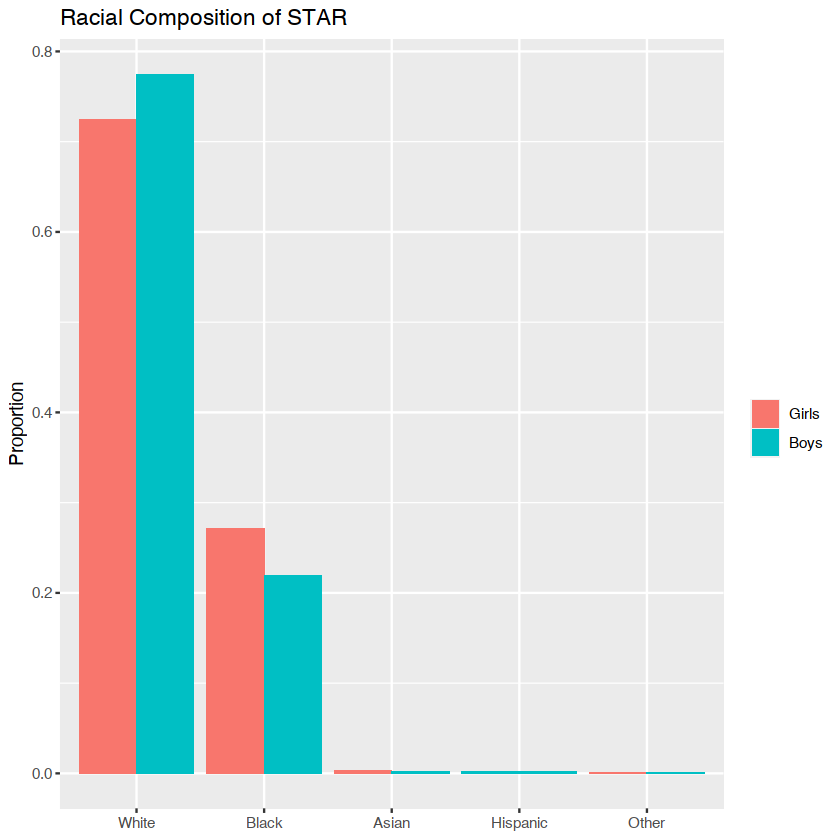

In [8]:
# Your answer here!

# START
ggplot(star_race_props) +
    geom_col(aes(x = fct_reorder(race, desc(prop)), y = prop, fill = gender),
             position = "dodge") +
    scale_x_discrete(labels = c("White", "Black", "Asian", "Hispanic", "Other")) +
    scale_fill_discrete(name = NULL, labels = c("Girls", "Boys")) +
    labs(title = "Racial Composition of STAR", x = NULL, y = "Proportion")
# END

**3c. Resize the racial category labels, title, and axis titles using the `theme()` function. Center the title.** 

i. To resize and center the title use the argument: `plot.title = element_text(size = 16, hjust = 0.5)`.

ii. To resize the axis _values_ use the argument: `axis.text = element_text(size = 14)`.

iii. To resize the axis _titles_ use the argument: `axis.title = element_text(size = 14))`
          
iv. To resize the legend values, use the argument: `legend.text = element_text(size = 14)`.

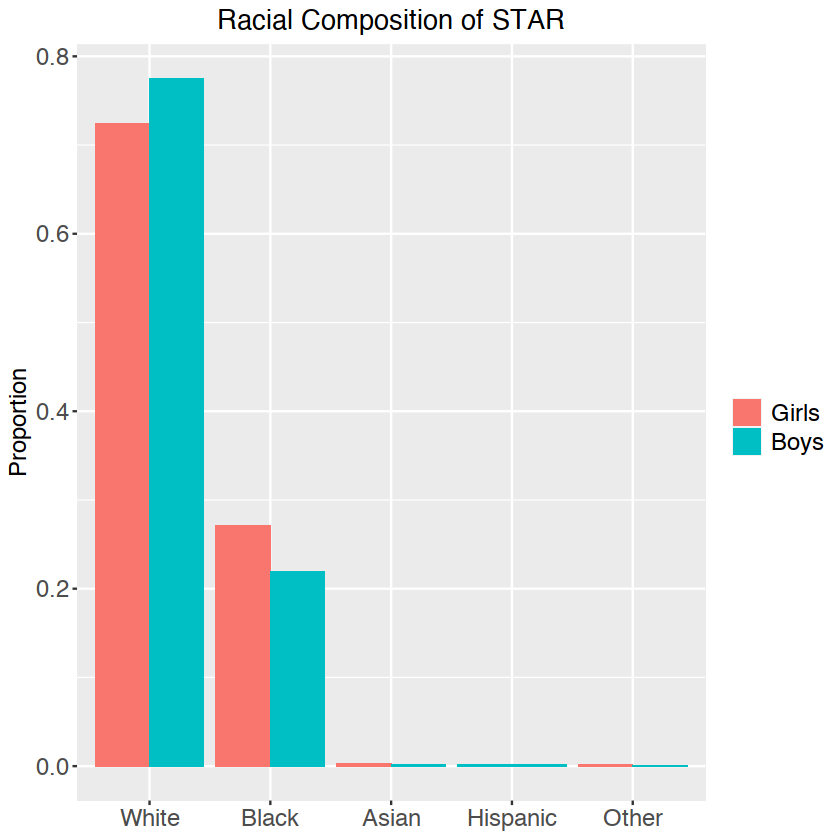

In [9]:
# Your answer here!

# START
ggplot(star_race_props) +
    geom_col(aes(x = fct_reorder(race, desc(prop)), y = prop, fill = gender),
             position = "dodge") +
    scale_x_discrete(labels = c("White", "Black", "Asian", "Hispanic", "Other")) +
    scale_fill_discrete(name = NULL, labels = c("Girls", "Boys")) +
    labs(title = "Racial Composition of STAR", x = NULL, y = "Proportion") +
    theme(plot.title = element_text(size = 16, hjust = 0.5),
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 14),
          legend.text = element_text(size = 14))
# END

**4. Do student test scores in kindergarten predict high school achievement? Plot past and future reading test scores.**

[1] 0.3703275

`geom_smooth()` using formula 'y ~ x'



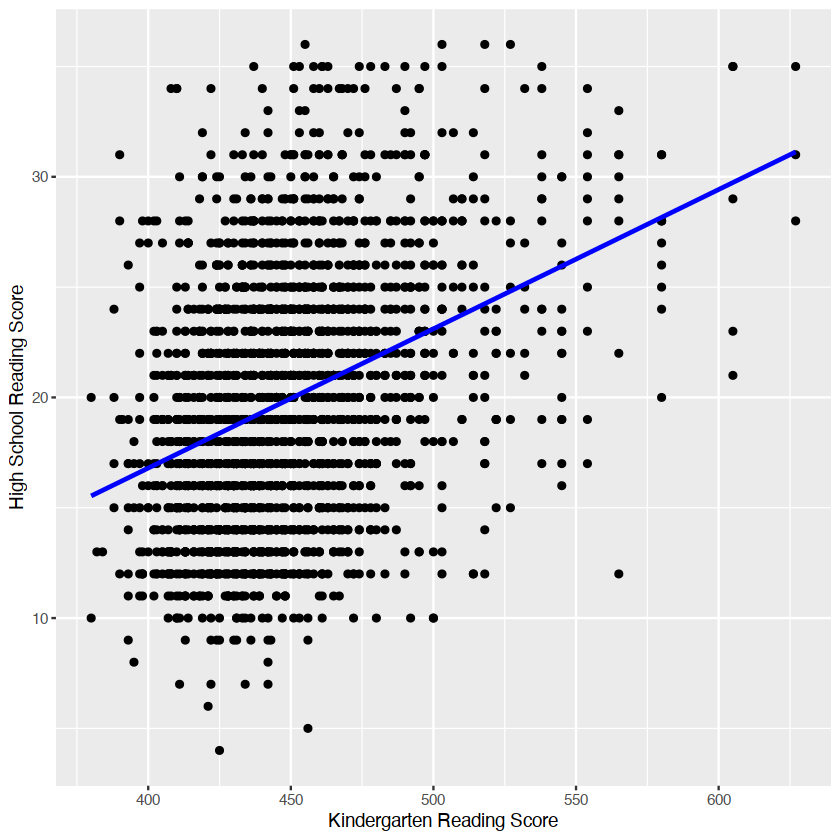

In [10]:
# Your answer here!

# START

# Calculate correlation between kindergarten and high school reading scores
cor(star_data_clean$gktreadss, star_data_clean$hsactread)

# Plot scores
ggplot(data = star_data_clean) +
  geom_point(aes(x = gktreadss, y = hsactread)) +
  geom_smooth(aes(x = gktreadss, y = hsactread), 
              method = "lm", se = FALSE, color = "blue") +
  labs(x = "Kindergarten Reading Score", y = "High School Reading Score")

# END

**5. Use `summarize` to calculate the sample size and mean and standard deviation of reading scores by classroom size (small vs. large). Then calculate the bounds of the 95% confidence interval for each class size by creating a variable `reading_score_lb` for the lower bound and `reading_score_ub` for the upper bound.**

Hint: Recall you can calculate a 95% confidence interval for the mean using $\hat\mu \pm 2 \dfrac{\hat\sigma}{\sqrt{n}}$.

In [11]:
# Your answer here!

# START
star_by_size <- star_data_clean %>%
    group_by(gkclasstype) %>%
    summarize(reading_score_mean = mean(gktreadss), 
              reading_score_sd = sd(gktreadss),
              n = n()) %>%
    mutate(reading_score_lb = reading_score_mean - 2 * reading_score_sd / sqrt(n),
           reading_score_ub = reading_score_mean + 2 * reading_score_sd / sqrt(n))

star_by_size

# END

gkclasstype,reading_score_mean,reading_score_sd,n,reading_score_lb,reading_score_ub
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
R,448.2054,33.05628,1563,446.5331,449.8776
S,453.3860,32.86478,684,450.8727,455.8992


**6. Do students from small classrooms report higher reading scores in kindergarten? Plot your estimates and add error bars for the 95% confidence interval.**

i. Use `geom_col()` to plot the sample mean.

ii. Use `geom_errorbar()` to plot the confidence interval. In addition to `x` it needs a `ymin` and `ymax` aesthetic. These should correspond to the bounds of your confidence interval.

iii. Use `scale_x_discrete(labels = c("Large", "Small"))` to label the x values.

iv. Use `coord_cartesian(ylim = c(420, 460))` to plot only the range of y values between 420 and 460.

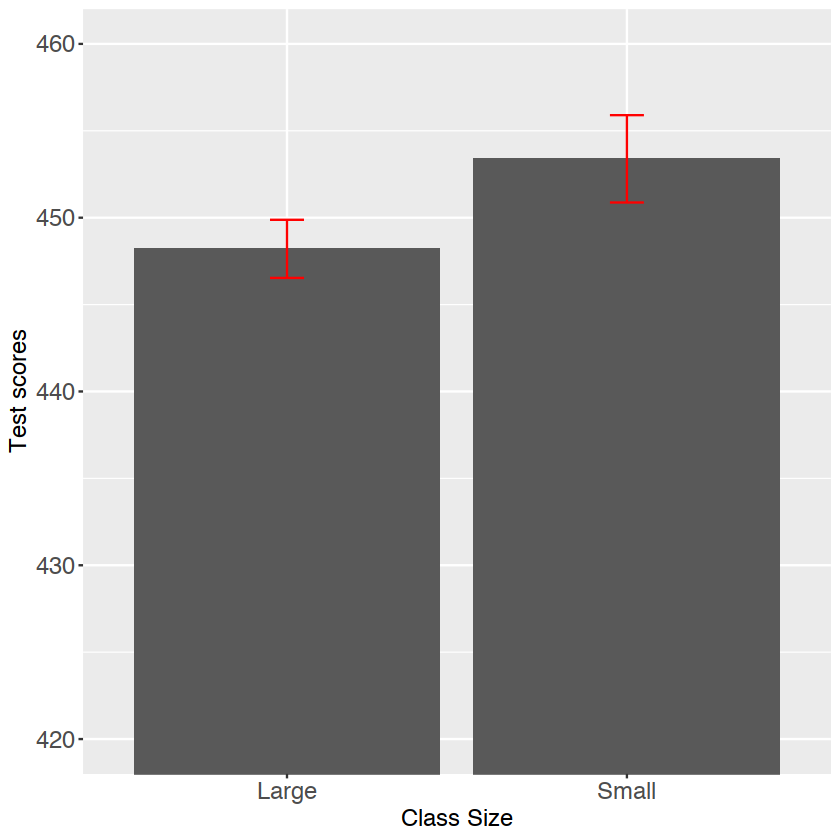

In [12]:
# Your answer here!

# START
ggplot(star_by_size) +
  geom_col(aes(x = gkclasstype, y = reading_score_mean)) +
  geom_errorbar(aes(x = gkclasstype, ymin = reading_score_lb, ymax = reading_score_ub),
                color = "red", width = .1) +
  scale_x_discrete(labels = c("Large", "Small")) +
  labs(x = "Class Size", y = "Test scores") +
  coord_cartesian(ylim = c(420, 460)) +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 14))

# END  